In [1]:
#reload source files automatically
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
import sklearn.neighbors
import sklearn.metrics
from __future__ import print_function

from lime_time_series import *

In [120]:
# read dataset
train = pd.read_csv('time_series/Trace_TRAIN', header=None)
test = pd.read_csv('time_series/Trace_TEST', header=None)
train = train[train[0]>2].reset_index().drop(['index'], axis=1)
test = test[test[0]>2].reset_index().drop(['index'], axis=1)

Y_columns = [0]
Y_train = train[Y_columns]
X_train = train.drop(Y_columns, axis=1)
Y_test = test[Y_columns]
X_test = test.drop(Y_columns, axis=1)
print(Y_train)
print(X_train)
print(Y_test)
print(X_test)

    0
0   4
1   3
2   4
3   4
4   4
5   4
6   4
7   4
8   3
9   4
10  3
11  4
12  4
13  4
14  4
15  3
16  4
17  4
18  4
19  4
20  4
21  3
22  3
23  3
24  3
25  3
26  4
27  4
28  4
29  4
30  3
31  4
32  3
33  4
34  3
35  3
36  4
37  4
38  3
39  3
40  4
41  3
42  3
43  3
44  3
45  3
46  3
47  4
48  4
49  4
50  4
51  3
52  4
       1       2       3       4       5       6       7       8       9    \
0  -2.0450 -2.0917 -2.0776 -2.0335 -1.9902 -2.0577 -2.0128 -2.0510 -2.0553   
1  -1.7050 -1.7391 -1.7257 -1.8017 -1.7425 -1.7604 -1.6916 -1.6875 -1.7615   
2  -1.2782 -1.2707 -1.2754 -1.2440 -1.2965 -1.2244 -1.2484 -1.2160 -1.2532   
3  -1.3775 -1.3210 -1.3544 -1.3812 -1.3892 -1.3638 -1.3376 -1.3967 -1.4016   
4  -1.3417 -1.3698 -1.3107 -1.3615 -1.3929 -1.3285 -1.3216 -1.3424 -1.3413   
5  -1.8242 -1.8386 -1.8406 -1.8113 -1.8369 -1.8369 -1.8307 -1.8467 -1.8126   
6  -1.7873 -1.7555 -1.7595 -1.7479 -1.8049 -1.8112 -1.7073 -1.7574 -1.7533   
7  -2.0474 -2.1287 -2.0829 -2.0998 -2.0667 -2.0413 -

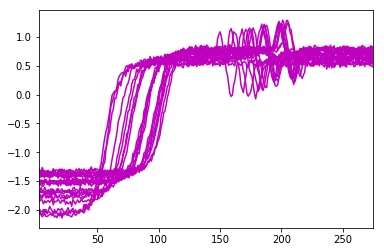

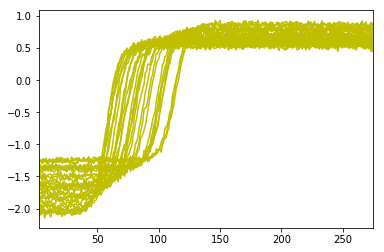

In [121]:
#train[train[0]==1].transpose()[1:].plot(legend=False, color='k')
#plt.show()
#train[train[0]==2].transpose()[1:].plot(legend=False, color='c')
#plt.show()
train[train[0]==3].transpose()[2:].plot(legend=False, color='m')
plt.show()
train[train[0]==4].transpose()[2:].plot(legend=False, color='y')
plt.show()
#test[test[0]==1].transpose()[1:].plot(legend=False, color='y')
#plt.show()

In [122]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [123]:
def DTWDistance_windowed(s1, s2):
    DTW={}

    w = max(10, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [124]:
kNN = sklearn.neighbors.KNeighborsClassifier(metric=DTWDistance_windowed)
kNN.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function DTWDistance_windowed at 0x000001E41BF61840>,
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [125]:
pred = kNN.predict(X_test[0:10])

In [126]:
pred

array([3, 3, 3, 4, 3, 4, 3, 3, 4, 3], dtype=int64)

In [127]:
sklearn.metrics.accuracy_score(Y_test[0:10].values.ravel(), pred)

0.90000000000000002

In [128]:
explainer = LimeTimeSeriesExplainer()

In [136]:
test_series_index = 0
exp = explainer.explain_instance(X_test.iloc[[test_series_index]], kNN.predict_proba, num_features=10, num_ranges=10, num_samples=50)
print('Series id: %d' % test_series_index)
#print('Probabilities: ', kNN.predict_proba([X_test[test_series_index]]))
print('True class: %s' % pred[test_series_index])

[2 7 4 7 5 1 3 7 6 1 3 6 5 8 5 2 7 3 0 4 2 4 1 0 7 6 1 7 4 1 4 3 0 1 4 6 2
 7 4 2 1 0 6 0 4 8 7 5 4]
       0       1       2       3       4       5       6       7      8    \
0  -1.2967 -1.3337 -1.3495 -1.3186 -1.3075 -1.2552 -1.2731 -1.2543 -1.299   
1  -1.2967 -1.3337 -1.3495 -1.3186 -1.3075 -1.2552 -1.2731 -1.2543 -1.299   
2   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
3  -1.2967 -1.3337 -1.3495 -1.3186 -1.3075 -1.2552 -1.2731 -1.2543 -1.299   
4   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
5   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
6  -1.2967 -1.3337 -1.3495 -1.3186 -1.3075 -1.2552 -1.2731 -1.2543 -1.299   
7   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
8   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
9   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
10 -1.2967 -1.3337 -1.3495 -1.3186 -1.3075 -1.2552 -

[[ 0.8  0.2]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.2  0.8]
 [ 0.6  0.4]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]]
[  1.11022302e-14   1.05572809e+01   4.52277442e+01   2.25403331e+01
   4.52277442e+01   2.92893219e+01   5.13167019e+00   1.63339973e+01
   4.52277442e+01   3.67544468e+01   5.13167019e+00   1.63339973e+01
   3.67544468e+01   2.92893219e+01   5.52786405e+01   2.92893219e+01
   1.05572809e+01   4.52277442e+01   1.63339973e+01   1.11022302e-14
   2

In [142]:
features = exp.as_list()
features.sort(key=lambda x: x[1])
print(features)

[(0, -0.25565605575341588), (2, -0.21192312396321095), (4, -0.088461298247932932), (1, -0.05172337932352624), (6, 0.019920891811985593), (9, 0.042634968712094677), (5, 0.066245982729045222), (8, 0.091807538667723759), (7, 0.10193575012283296), (3, 0.1025378628999232)]
